In [13]:
# Dependencies
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import torch
from torch import nn

import matplotlib.pyplot as plt

import numpy as np

In [15]:
# make the dataset
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X, y = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

In [16]:
print(type(X), X.shape)
print(type(y), y.shape)
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

<class 'numpy.ndarray'> (1000, 2)
<class 'numpy.ndarray'> (1000,)
First 5 X features:
[[-8.41339595  6.93516545]
 [-5.76648413 -6.43117072]
 [-6.04213682 -6.76610151]
 [ 3.95083749  0.69840313]
 [ 4.25049181 -0.28154475]]

First 5 y labels:
[3 2 2 1 1]


In [17]:
# Make DataFrame of circle data
import pandas as pd

circles = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,-8.413396,6.935165,3
1,-5.766484,-6.431171,2
2,-6.042137,-6.766102,2
3,3.950837,0.698403,1
4,4.250492,-0.281545,1
5,-6.794108,-6.477221,2
6,5.210176,2.889048,1
7,-5.505136,-6.360377,2
8,-6.543756,-4.833899,2
9,6.449642,0.747766,1


In [18]:
# Check different labels
print(circles.label.value_counts())

label
3    250
2    250
1    250
0    250
Name: count, dtype: int64


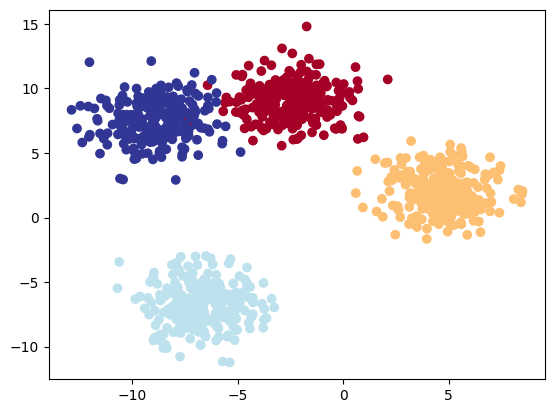

In [19]:
# plot the data
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [20]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=RANDOM_SEED) # make the random split reproducible

In [21]:
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)
print(X_train[:5])
print(y_train[:5])

<class 'numpy.ndarray'> (800, 2)
<class 'numpy.ndarray'> (800,)
[[ 5.04045424  3.30761588]
 [-2.62485019  9.52601409]
 [-8.52403982 -9.04018592]
 [-6.02615257 -4.43751466]
 [-3.33967158  7.21746929]]
[1 0 2 2 0]


In [22]:
# turn into Pytorch tensors
X_train = torch.from_numpy(X_train).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.float)
X_test = torch.from_numpy(X_test).type(torch.float)
y_test = torch.from_numpy(y_test).type(torch.float)

In [23]:
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)
print(X_train[:5])

<class 'torch.Tensor'> torch.Size([800, 2])
<class 'torch.Tensor'> torch.Size([800])
tensor([[ 5.0405,  3.3076],
        [-2.6249,  9.5260],
        [-8.5240, -9.0402],
        [-6.0262, -4.4375],
        [-3.3397,  7.2175]])


In [24]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [25]:
# Building a model
# Build a multi-class classification model
class CirclesMultiClassClassification(nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()
        # dense layers
        self.layer_1 = nn.Linear(in_features=num_features, out_features=16)
        self.layer_2 = nn.Linear(in_features=16, out_features=16)
        self.layer_3 = nn.Linear(in_features=16, out_features=num_classes)
        # relu activation layer
        self.relu = nn.ReLU()
    
    # define a forward method containing the forward pass computation
    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = self.layer_3(x)  # No softmax here, as it's included in the CrossEntropyLoss
        return x

In [27]:
# Create an instance of the model and print it out
model = CirclesMultiClassClassification(num_features=2, num_classes=4).to(device)
print(model)

CirclesMultiClassClassification(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=4, bias=True)
  (relu): ReLU()
)


In [35]:
# Print out the output of the model
y_logits = model(X_test[:5])
y_probs = torch.softmax(y_logits, dim=1)
y_pred = y_probs.argmax(dim=1)
print(y_logits)
print(y_probs)
print(y_pred)
print(y_test[:5])

tensor([[ 0.8007,  0.5067, -0.1620, -0.5431],
        [ 0.8350,  0.1674, -1.1181, -0.4475],
        [-0.8534,  0.0188, -0.4748, -0.3690],
        [ 0.3929,  0.2527, -0.2363, -0.3499],
        [ 0.8875,  0.3042, -0.6640, -0.9071]], grad_fn=<AddmmBackward0>)
tensor([[0.4188, 0.3121, 0.1599, 0.1092],
        [0.5176, 0.2655, 0.0734, 0.1435],
        [0.1544, 0.3694, 0.2255, 0.2507],
        [0.3475, 0.3020, 0.1852, 0.1653],
        [0.5165, 0.2882, 0.1095, 0.0858]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0, 1, 0, 0])
tensor([1., 3., 2., 1., 0.])


In [32]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [33]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_target, y_pred):
    correct = torch.eq(y_target, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [41]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device).long()
X_test, y_test = X_test.to(device), y_test.to(device).long()

for epoch in range(epochs):
    ### Training
    model.train()

    # 1. Forward pass
    y_logits = model(X_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits[:3])
    # print(y_train[:3])
    # print(y_pred[:3])
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) 
    acc = accuracy_fn(y_train, y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      y_test_logits = model(X_test)
      y_test_pred = torch.softmax(y_test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(y_test_logits, y_test)
      test_acc = accuracy_fn(y_test, y_test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Evaluatin Loss: {test_loss:.5f}, Evaluation Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.58794, Acc: 98.38% | Evaluatin Loss: 0.46905, Evaluation Acc: 99.00%
Epoch: 10 | Loss: 0.14387, Acc: 99.12% | Evaluatin Loss: 0.12371, Evaluation Acc: 99.50%
Epoch: 20 | Loss: 0.07918, Acc: 99.25% | Evaluatin Loss: 0.06815, Evaluation Acc: 99.50%
Epoch: 30 | Loss: 0.05758, Acc: 99.12% | Evaluatin Loss: 0.04835, Evaluation Acc: 99.50%
Epoch: 40 | Loss: 0.04730, Acc: 99.12% | Evaluatin Loss: 0.03856, Evaluation Acc: 99.50%
Epoch: 50 | Loss: 0.04146, Acc: 99.12% | Evaluatin Loss: 0.03277, Evaluation Acc: 99.50%
Epoch: 60 | Loss: 0.03774, Acc: 99.12% | Evaluatin Loss: 0.02900, Evaluation Acc: 99.50%
Epoch: 70 | Loss: 0.03519, Acc: 99.12% | Evaluatin Loss: 0.02634, Evaluation Acc: 99.50%
Epoch: 80 | Loss: 0.03334, Acc: 99.12% | Evaluatin Loss: 0.02440, Evaluation Acc: 99.50%
Epoch: 90 | Loss: 0.03196, Acc: 99.12% | Evaluatin Loss: 0.02291, Evaluation Acc: 99.50%


In [42]:
# Make prediction logits with model
x = X_test[:5]
y = y_test[:5]

x = x.to(device)
y = y.to(device)

y_logits = model(x)
y_probs = torch.softmax(y_logits, dim=1)
y_pred = y_probs.argmax(dim=1)

print(y_logits)
print(y_probs)
print(y_pred)
print(y)

tensor([[ 2.4691,  8.7250, -2.8059, -4.8666],
        [ 0.9030, -6.6772, -1.1762,  6.3428],
        [-4.8133, -3.2700,  4.9821, -2.2651],
        [ 0.7301,  5.6508, -1.6485, -2.8508],
        [ 7.4311,  2.3457, -4.4103, -2.9968]], grad_fn=<AddmmBackward0>)
tensor([[1.9154e-03, 9.9807e-01, 9.8031e-06, 1.2485e-06],
        [4.3193e-03, 2.2048e-06, 5.4003e-04, 9.9514e-01],
        [5.5651e-05, 2.6045e-04, 9.9897e-01, 7.1142e-04],
        [7.2348e-03, 9.9189e-01, 6.7053e-04, 2.0150e-04],
        [9.9382e-01, 6.1482e-03, 7.1557e-06, 2.9412e-05]],
       grad_fn=<SoftmaxBackward0>)
tensor([1, 3, 2, 1, 0])
tensor([1, 3, 2, 1, 0])
